## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [15]:
import statsmodels.api as sm

In [2]:
# y = m * X + c
X = np.arange(0, 30, 0.277)
y = 0.9912 * X + 0.7734
print(len(X), len(y))

109 109


In [3]:
X_mean = X.mean()
y_mean = y.mean()
print(X_mean, y_mean)

14.958 15.599769600000002


In [4]:
n = len(X)
cov_X_y = (1/n) * np.sum((X-X_mean) * (y-y_mean))
cov_X = (1/n) * np.sum(np.square(X-X_mean))
print(cov_X_y)
print(cov_X)

75.29324695200002
75.96171000000002


In [5]:
b1 = cov_X_y / cov_X
print(f"b1 = {b1}")
b0 = y_mean - b1 * X_mean
print(f"b0 = {b0}")

b1 = 0.9912
b0 = 0.7734000000000023


In [6]:
print(f'y = {b0:.4f} + {b1:.4f}*X')

y = 0.7734 + 0.9912*X


## using sklearn

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(0, 30, 0.277)
y = 0.9912 * X + 0.7734

In [8]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [9]:
def plot_data(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, predictions=None):
    plt.scatter(X_train, y_train, c='b', label='training data')
    plt.scatter(X_test, y_test, c='r', label='testing data')
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g', label='Predicted data')
    plt.title("X vs y")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

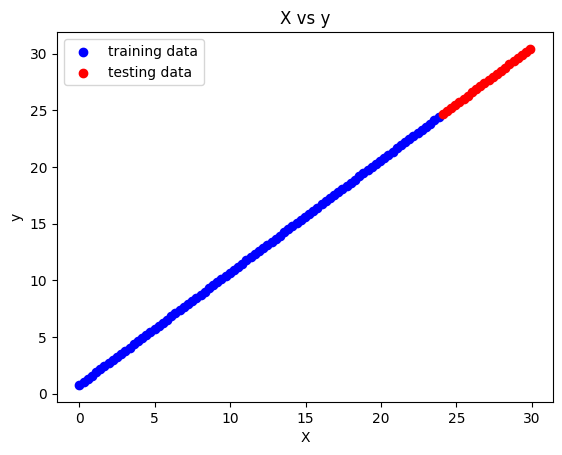

In [10]:
plot_data()

In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train.reshape(-1,1), y_train)
predictions = lr_model.predict(X_test.reshape(-1, 1))

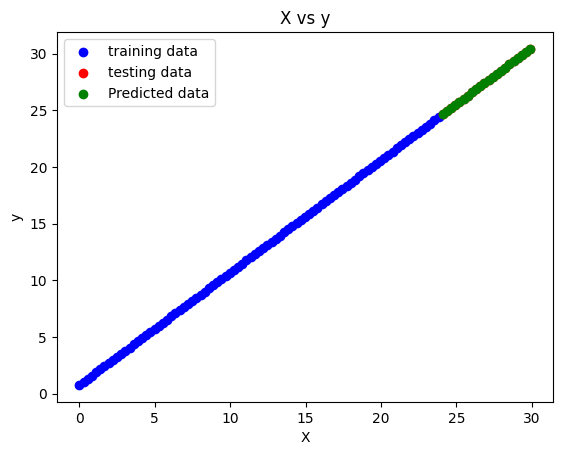

In [12]:
plot_data(predictions=predictions)

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

1.0


In [18]:
# add constant for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

#Summary
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.668e+32
Date:                Mon, 09 Feb 2026   Prob (F-statistic):               0.00
Time:                        12:52:46   Log-Likelihood:                 2796.0
No. Observations:                  87   AIC:                            -5588.
Df Residuals:                      85   BIC:                            -5583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7734   5.74e-16   1.35e+15      0.0

In [22]:
y_predict = model.predict(X_test_sm)
plot_data(X_train_sm, y_train, X_test=X_test_sm)

ValueError: shapes (44,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [24]:
X1 = np.arange(0, 30, 0.277)
X2 = np.arange(0, 30, 0.277)
y = 9.9912 * X1 + 5.5555 * X2 + 4.7734

df = pd.DataFrame({
    "X1": X1,
    "X2": X2,
    "y": y
})
X = df.drop(columns='y')
y=df['y']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# add constant for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

#Summary
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.590e+32
Date:                Mon, 09 Feb 2026   Prob (F-statistic):               0.00
Time:                        13:03:15   Log-Likelihood:                 2528.0
No. Observations:                  87   AIC:                            -5052.
Df Residuals:                      85   BIC:                            -5047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7734   1.26e-14   3.78e+14      0.0

In [27]:
y_preds = model.predict(X_test_sm)
print(y_preds)


78     340.675400
10      47.837759
4       21.999144
84     366.514016
64     280.385298
68     297.611041
30     133.966477
45     198.563015
96     418.191246
11      52.144195
79     344.981836
80     349.288272
0        4.773400
81     353.594708
18      82.289246
70     306.223913
56     245.933810
72     314.836785
107    465.562041
42     185.643708
12      56.450631
36     159.805092
dtype: float64


## Exploratory data Analysis

In [29]:
import pandas as pd
df = pd.read_csv("tips.csv")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    str    
 3   smoker      244 non-null    str    
 4   day         244 non-null    str    
 5   time        244 non-null    str    
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), str(4)
memory usage: 13.5 KB


In [31]:
df.sample(10)

,total_bill,tip,gender,smoker,day,time,size
222,8.58,1.92,Male,Yes,Fri,Lunch,1
214,28.17,6.50,Female,Yes,Sat,Dinner,3
46,22.23,5.00,Male,No,Sun,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
228,13.28,2.72,Male,No,Sat,Dinner,2
196,10.34,2.00,Male,Yes,Thur,Lunch,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2
77,27.20,4.00,Male,No,Thur,Lunch,4


In [32]:
#summary statistics
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [33]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='day'>

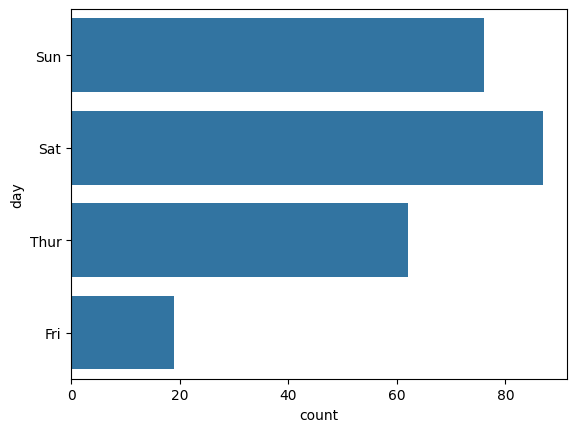

In [40]:
import seaborn as sns
sns.countplot(df['day'])

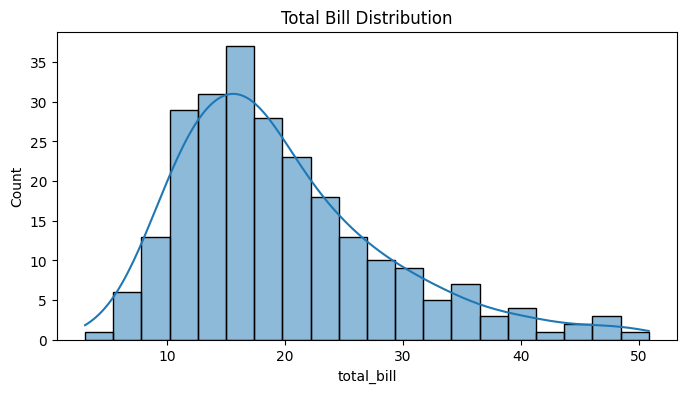

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.histplot(df['total_bill'], kde=True, bins=20)
plt.title("Total Bill Distribution")
plt.show()

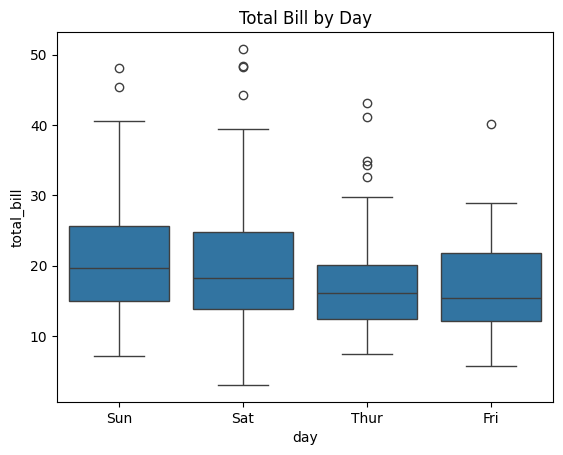

In [42]:
sns.boxplot(x='day', y='total_bill', data = df)
plt.title("Total Bill by Day")
plt.show()

<Axes: >

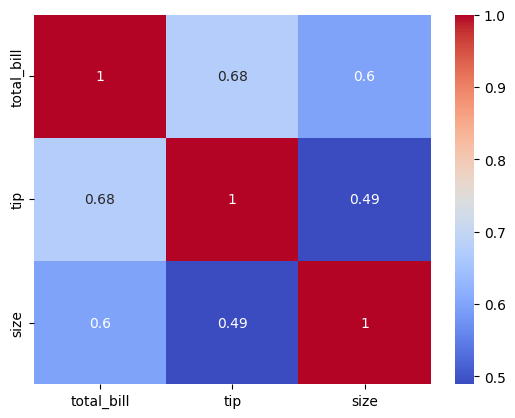

In [52]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

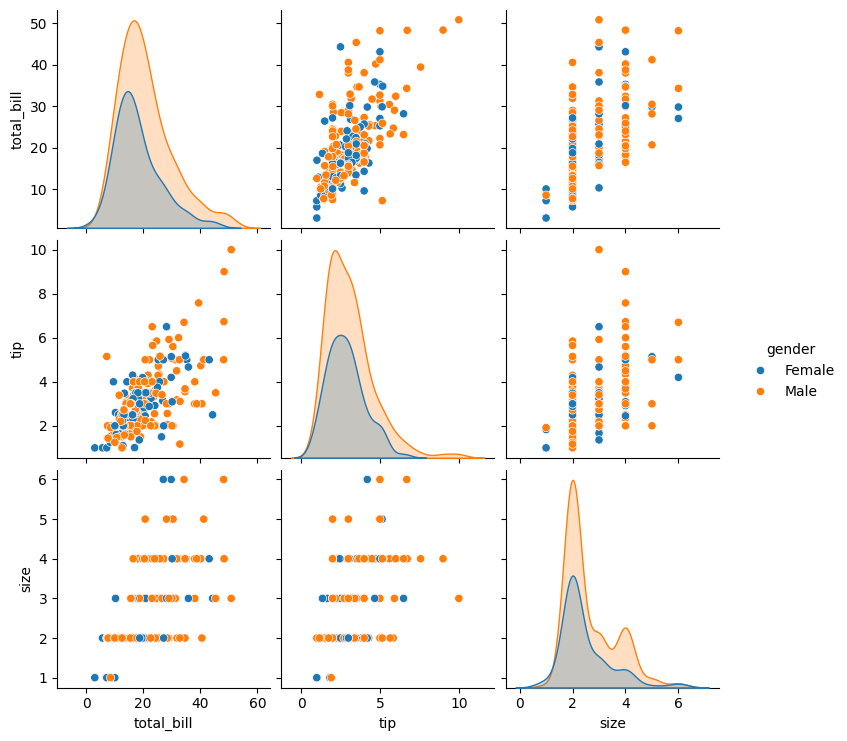

In [53]:
sns.pairplot(df, hue='gender')
plt.show()

In [54]:
from scipy.stats import chi2_contingency
# Relationship between gender and smoking habit

contingency_table = pd.crosstab(df['gender'], df['smoker'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, P-value: {p}, dof: {dof}")

Chi2: 0.0, P-value: 1.0, dof: 1
